<a href="https://colab.research.google.com/github/visheshagrawal/Course-Computer-Vision/blob/main/CV_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Saliency Map**

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread("cv_hw3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# flatten_gray=gray.flatten()

In [ ]:
img.shape[0]

64

In [ ]:
height=img.shape[0]
width=img.shape[1]

In [ ]:
saliency_map=np.zeros((height,width))
for i in range(height):
  for j in range(width):
    combined_sal=0
    for k in range(height):
      for l in range(width):
        b_norm = np.square(img[i][j][0]-img[k][l][0])
        g_norm = np.square(img[i][j][0]-img[k][l][0])
        r_norm = np.square(img[i][j][0]-img[k][l][0])
        combined_norm = np.sqrt(b_norm+g_norm+r_norm)
        # print(combined_norm)
        point1,point2= np.array([i,j]), np.array([k,l])
        dist= np.linalg.norm(point1 -point2)
        eucl_fac= np.exp(-dist)
        combined_sal += combined_norm*eucl_fac
        # combined_sal += combined_norm
    saliency_map[i][j]=combined_sal
    print(i,j,combined_sal)

In [ ]:
max=float("-inf")
min=float("inf")
for i in range(height):
  for j in range(width):
    if saliency_map[i][j]>max:
      max=saliency_map[i][j]
    if saliency_map[i][j]<min:
      min=saliency_map[i][j]

In [ ]:
import pickle
with open('test.pkl','wb') as f:
  pickle.dump(saliency_map, f)

In [ ]:
import copy
new_sal_map=copy.deepcopy(saliency_map)
for i in range(height):
  for j in range(width):
    new_sal_map[i][j]=(max-saliency_map[i][j])/(max)
    new_sal_map[i][j]=new_sal_map[i][j]*255


In [ ]:
import copy
new_sal_map=copy.deepcopy(saliency_map)
for i in range(height):
  for j in range(width):
    new_sal_map[i][j]=np.log(1+new_sal_map[i][j]*100)


In [ ]:
import copy
new_sal_map=copy.deepcopy(saliency_map)
for i in range(height):
  for j in range(width):
    if (saliency_map[i][j]>50):
      new_sal_map[i][j]=255
    if (saliency_map[i][j]<=50):
      new_sal_map[i][j]=0

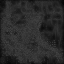

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(saliency_map)

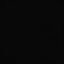

array([[7.5569877 , 7.43058585, 7.2476333 , ..., 7.52943119, 7.07429674,
        6.56674008],
       [7.19907548, 7.42210677, 7.60522648, ..., 7.36268655, 7.03421392,
        6.94631487],
       [7.04423284, 7.35276057, 7.63921986, ..., 7.30312508, 6.83676977,
        6.33847153],
       ...,
       [7.85219332, 8.05436429, 7.92354285, ..., 8.26286312, 8.28383194,
        7.93138301],
       [7.63334534, 7.95503398, 8.052618  , ..., 8.19943142, 8.09224155,
        7.92064257],
       [7.4696862 , 7.44344212, 7.85705358, ..., 7.70089758, 7.71715453,
        7.54382336]])

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(new_sal_map)
new_sal_map

In [ ]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(img)
# if we would like a *binary* map that we could process for contours,
# compute convex hull's, extract bounding boxes, etc., we can
# additionally threshold the saliency map
threshMap = cv2.threshold(saliencyMap.astype("uint8"), 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [ ]:
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(img)
saliencyMap = (saliencyMap * 255).astype("uint8")

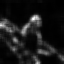

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(saliencyMap)